# Stochastic Processes: Bernoulli Chain Simulation

This notebook simulates a stochastic process where the state evolves according to a Bernoulli chain. 
It visualizes the trajectory and empirical distributions of two related sequences, \(X_n\) and \(Y_n\), and compares their asymptotic behavior.

## Import Required Libraries
We begin by importing the necessary Python libraries for numerical computation and visualization.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

## Define the Bernoulli Chain Function
The function `bernoulli(a, N)` generates a sequence \(X_n\) and its associated sequence \(Y_n\).

- \(X_n\) follows the recursive relation: \(X_{n+1} = a X_n + \theta\), where \(\theta\) is a random choice from \{+1, -1\}.
- \(Y_n\) is defined as the cumulative sum of weighted random choices.

### Parameters:
- `a`: Coefficient that determines how much the previous state influences the new state.
- `N`: Number of iterations in the sequence.

### Returns:
- `X_chain`: List containing the sequence \(X_n\).
- `Y_chain`: List containing the sequence \(Y_n\).

In [2]:
def bernoulli(a, N):
    # Initialize the chains
    X_chain = np.zeros(N+1)
    Y_chain = np.zeros(N+1)
    
    for n in range(N):
        theta = random.choice([1, -1])
        X_chain[n+1] = a * X_chain[n] + theta
        Y_chain[n+1] = Y_chain[n] + a**n * theta
    
    return X_chain, Y_chain

## Simulating a Single Bernoulli Process
We generate and visualize a single realization of the stochastic process for \(N = 300\) steps.

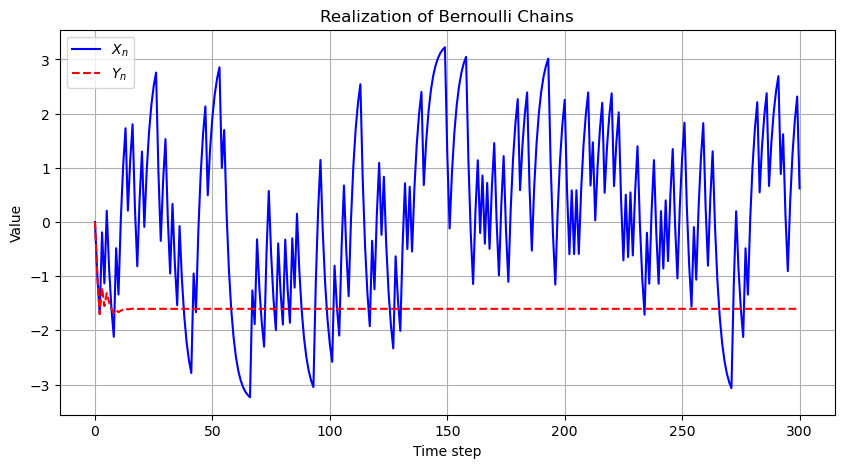

In [3]:
# Set parameters
N = 300
a = 0.7

X_chain, Y_chain = bernoulli(a, N)
plt.figure(figsize=(10, 5))
plt.plot(X_chain, label='$X_n$', color='blue', linewidth=1.5)
plt.plot(Y_chain, label='$Y_n$', color='red', linewidth=1.5, linestyle='dashed')
plt.legend()
plt.xlabel("Time step")
plt.ylabel("Value")
plt.title("Realization of Bernoulli Chains")
plt.grid(True)
plt.show()

## Convergence in Distribution
We generate `n_sim = 10000` realizations of \(X_N\) and \(Y_N\) to study their empirical distribution.

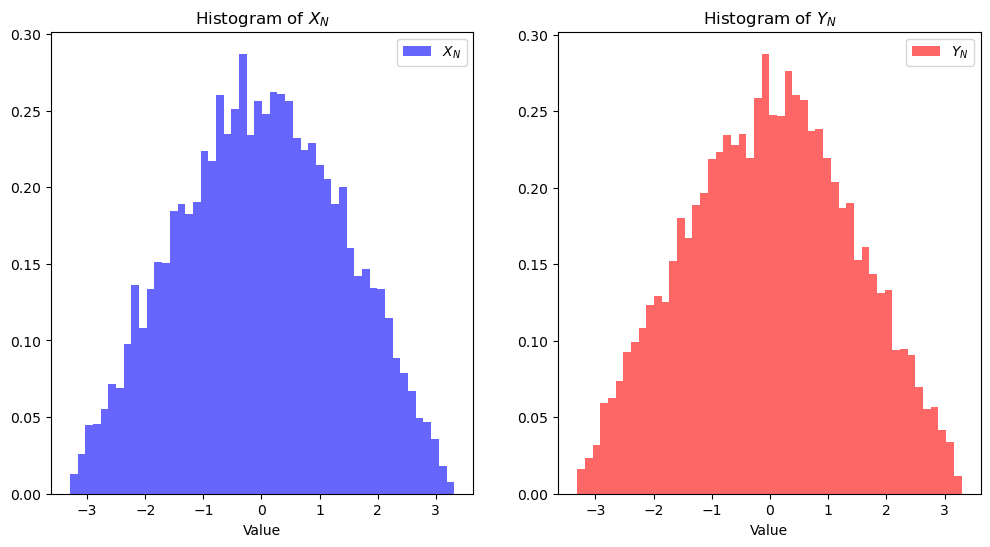

In [4]:
n_sim = 10000
X = np.zeros(n_sim)
Y = np.zeros(n_sim)
for i in range(n_sim):
    X_chain, Y_chain = bernoulli(a, N)
    X[i] = X_chain[-1]
    Y[i] = Y_chain[-1]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(X, bins=50, density=True, alpha=0.6, color='blue', label='$X_N$')
ax[1].hist(Y, bins=50, density=True, alpha=0.6, color='red', label='$Y_N$')
ax[0].set_title("Histogram of $X_N$")
ax[1].set_title("Histogram of $Y_N$")
ax[0].set_xlabel("Value")
ax[1].set_xlabel("Value")
ax[0].legend()
ax[1].legend()
plt.show()

## Empirical Cumulative Distribution Function (CDF)
We compute and visualize the empirical cumulative distribution functions of \(X_N\) and \(Y_N\).

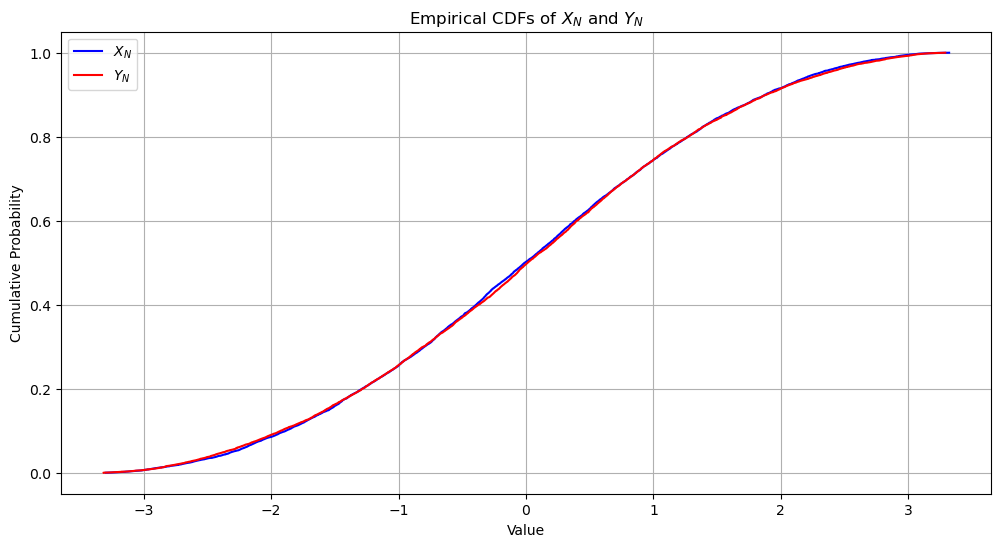

In [5]:
x_values = np.sort(X)
y_values = np.sort(Y)
cdf_x = np.arange(1, len(x_values) + 1) / len(x_values)
cdf_y = np.arange(1, len(y_values) + 1) / len(y_values)

plt.figure(figsize=(12, 6))
plt.plot(x_values, cdf_x, label='$X_N$', linestyle='-', color='blue')
plt.plot(y_values, cdf_y, label='$Y_N$', linestyle='-', color='red')
plt.title('Empirical CDFs of $X_N$ and $Y_N$')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

## Kernel Density Estimation (KDE)
Finally, we estimate the density functions of \(X_N\) and \(Y_N\) using Gaussian Kernel Density Estimation.

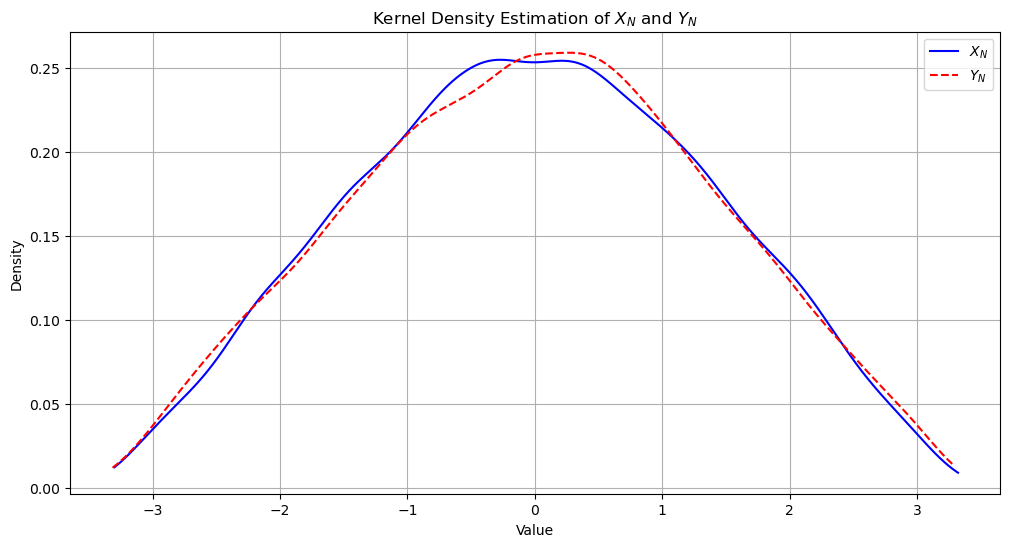

In [6]:
kde_x = gaussian_kde(X)
kde_y = gaussian_kde(Y)

x_values = np.linspace(min(X), max(X), 1000)
y_values = np.linspace(min(Y), max(Y), 1000)

plt.figure(figsize=(12, 6))
plt.plot(x_values, kde_x(x_values), label='$X_N$', linestyle='-', color='blue', linewidth=1.5)
plt.plot(y_values, kde_y(y_values), label='$Y_N$', color='red', linewidth=1.5, linestyle='dashed')
plt.title('Kernel Density Estimation of $X_N$ and $Y_N$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()